# Avocado Sales Analysis
## Time series modeling Using Historical Data.


Avocado is a fruit of the family Lauraceae. It is also known as alligator pear or butter fruit. Avocados are cultivated for their buttery consistency and nutty flavor and are used in both savory and sweet dishes. They are a source of vitamins C, E, K, and B6, as well as riboflavin, niacin, folate, pantothenic acid, magnesium, and potassium. They also provide lutein, beta carotene, and omega-3 fatty acids. Avocados contain high levels of healthy, beneficial fats, which can help a person feel fuller between meals.
Learn more:

<hr>
This project will use a bar plot to figure out which size is the most popular.

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

In [13]:
avocado = pd.read_csv('../Machine- Learning/avocado/avocado.csv', index_col=0)

avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [15]:
avocado.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


>Bar plots are used for revealing relationships between categorical data () and numerical data (Volume) variables, but manipulation on the data first is needed in order to get the numbers needed for plotting.



# Perform Data cleaning
<hr>

In [17]:
# Drop unwanted columns
columns_to_drop = ['4046', '4225', '4770']
avocado.drop(columns=columns_to_drop, inplace=True)

avocado.head()


,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Handle Duplicates
<hr>

In [32]:
# Check for duplicate rows
duplicate_rows = avocado[avocado.duplicated()]

# Display the duplicate rows if any
print("Duplicate rows:")
print(duplicate_rows)

# Check if there are any duplicate rows
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found.")

Duplicate rows:
Empty DataFrame
Columns: [Date, AveragePrice, Total Volume, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []
No duplicate rows found.


# Checking duplicate values by columns #
<hr>

In [36]:
duplicate_rows_subset = avocado[avocado.duplicated(subset=['AveragePrice', 'Total Volume'])]
print(duplicate_rows_subset)

Empty DataFrame
Columns: [Date, AveragePrice, Total Volume, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []


# Handling Missing Values 
<hr>

In [49]:
#Checking for missing values
missing_values = avocado.isna().any()
# Display the count of missing values for each column
print("Missing values count for each column:")
print(missing_values)

Missing values count for each column:
Date            False
AveragePrice    False
Total Volume    False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool


In [44]:
avocado.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# Exploratory Data Analysis
<hr>
After successfully handling missing values and cleaning the data I willl move to the next step where i will aggregate the data based on the **Date, **region, and **type** of avocado, to be able to analyze the temporal patterns, seasonal trends, and demand-supply dynamics. 

This will allow me to perform various analyses and gain insights into how the inventory varies over time in different regions and avocado types.

In [56]:

avocado_agg = avocado.groupby(['region', 'type', 'Date']).size().reset_index(name='count')

avocado_agg = avocado_agg.sort_values(by='Date')

avocado_agg.head()

,region,type,Date,count
0,Albany,conventional,2015-01-04,1
10140,NorthernNewEngland,conventional,2015-01-04,1
338,Atlanta,conventional,2015-01-04,1
4394,Detroit,conventional,2015-01-04,1
10309,NorthernNewEngland,organic,2015-01-04,1


# Data Visualization
## Total volume sold for each avocado type group
<hr>

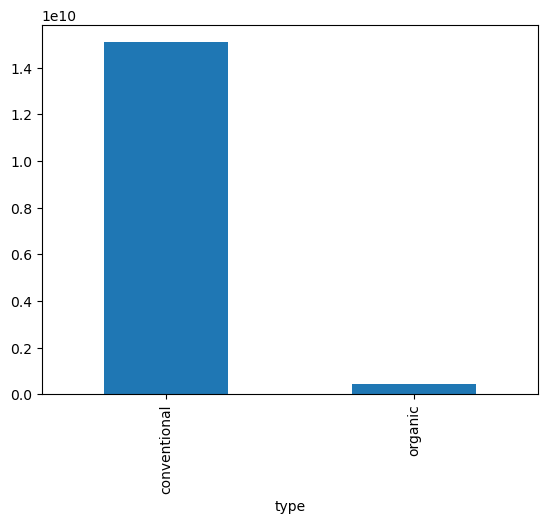

In [26]:
sold_by_size = avocado.groupby('type')['Total Volume'].sum()
sold_by_size.plot(kind='bar', x='type', y = 'Total Volume') 
plt.show() 

It looks like type Conventional avocados were the most-purchased type, but organictype avocados were a close second.

# Changes in Sales of Avocado over a period of time
<hr>

# Visualizing the change in volume sales of Avocado over three years.

>Line plots can be useful for visualizing many different types of data, including:

**Time series data visualization:** 
They are useful for visualizing time series data, which refers to data that is collected over time. By plotting data points on a line, trends and patterns over time can be easily identified and communicated.

**Continuous data representation:** 
They can be used to represent continuous data, which is data that can take on any value within a range. ..


In [32]:
sold_by_date = avocado.groupby('Date')['Total Volume'].sum()
sold_by_date.head()


Date
2015-01-04    8.467434e+07
2015-01-11    7.855581e+07
2015-01-18    7.838878e+07
2015-01-25    7.646628e+07
2015-02-01    1.194532e+08
Name: Total Volume, dtype: float64

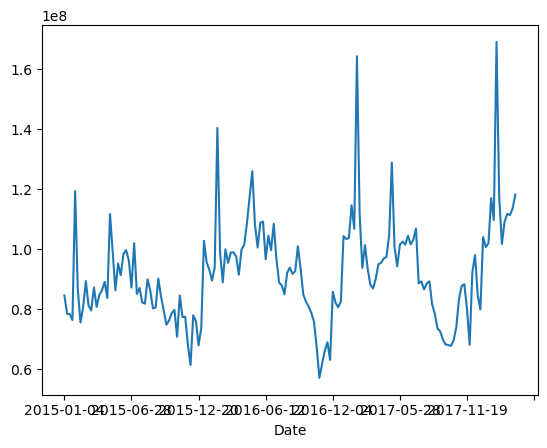

In [34]:
sold_by_date.plot(kind='line', x='Date', y='Total Volume')
plt.show()

Here it shows that number of Avocado spikes around the same time each year.

# Create an interactive time-series chart
<hr>

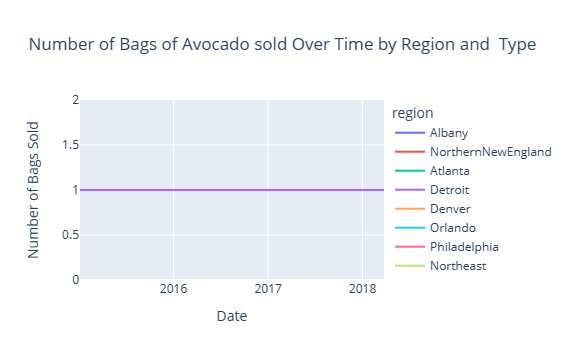

In [75]:

fig = px.line(avocado_agg, x='Date', y='count', color='region', line_group='type',
              title='Number of Bags of Avocado sold Over Time by Region and  Type',
              labels={'count': 'Number of Bags Sold'})

# Customize the layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Number of Bags Sold',
    hovermode='x',
    showlegend=True,
)

# Show the chart
fig.show()

# Total Volume of avocado purchased by region 

In [7]:
sold_by_region = avocado.groupby('region')['Total Volume'].sum()

sold_by_region.head()


region
Albany                 1.606780e+07
Atlanta                8.860512e+07
BaltimoreWashington    1.347139e+08
Boise                  1.441319e+07
Boston                 9.727398e+07
Name: Total Volume, dtype: float64

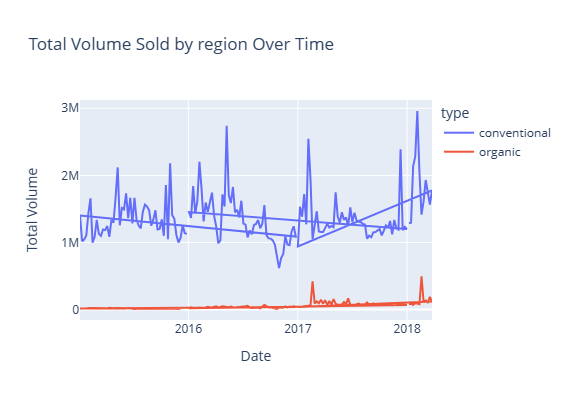

In [91]:

# Plot avocado prices in Seattle over time, categorized by avocado type
fig = px.line(avocado[msk], x='Date', y='Total Volume', color='type', title='Total Volume Sold by region Over Time', height=400, width=800)
fig.show()



Conventional type of avocado seemed to have the highest volume sales as compared to Organic.

type
conventional    9126
organic         9123
Name: count, dtype: int64
region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
Ca

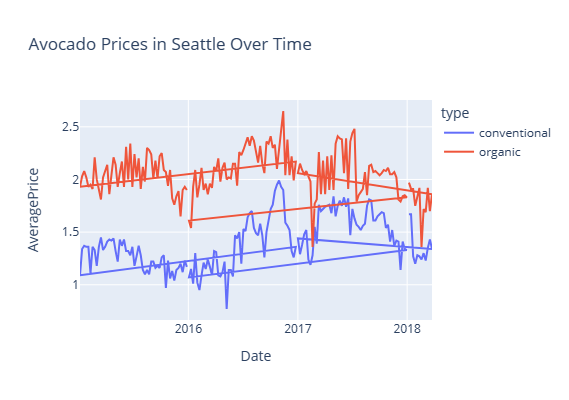

In [40]:

print(avocado['type'].value_counts(dropna=False))
print(avocado['region'].value_counts(dropna=False))

msk = avocado['region'] == 'NewYork'

# Plot avocado prices in Seattle over time, categorized by avocado type
fig = px.line(avocado[msk], x='Date', y='AveragePrice', color='type', title='Avocado Prices in Seattle Over Time', height=400, width=800)
fig.show()

# Avocados Supply and Demand
<hr>

Here we are comparing the average price of Avocado verses the total volume sold using a **scatter plot graph**. If they are related, one may be used to make predictions.

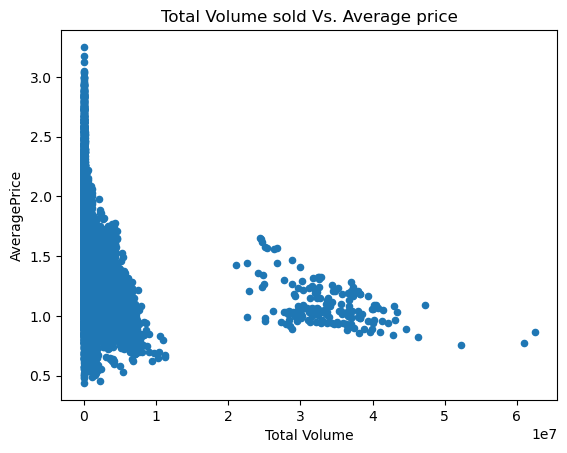

In [69]:
avocado.plot(kind='scatter', x='Total Volume', y='AveragePrice', title='Total Volume sold Vs. Average price')
plt.show()

Price  drops when more avocados are sold. But doesnt mean that when there are fewer sales there is a price shoot. This only tells that the two are correlated.

# Comparing the price of Conventional verses Organic.
<hr>

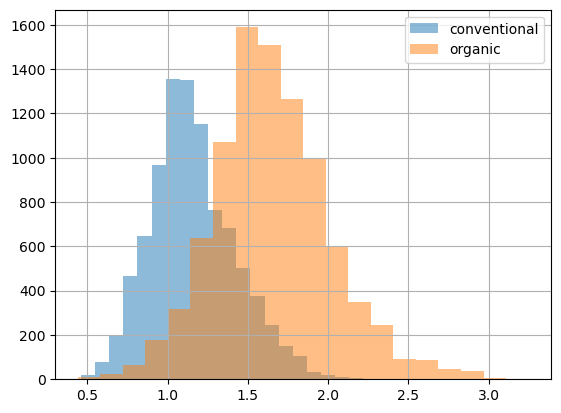

In [18]:
avocado[avocado['type']=='conventional']['AveragePrice'].hist(bins=20, alpha=0.5)
avocado[avocado['type']=='organic']['AveragePrice'].hist(bins=20, alpha=0.5)
plt.legend(['conventional', 'organic'])
plt.title='Price of Conventional vs. organic avocados'
plt.show()


From the above graph 
we can se that organic avocados has a higher price than conventional ones. but at some point there is an overlap. 

# Performing seasonal Decomposition and Showing Trends
<hr>